In [ ]:
import numpy as np
import cv2
import os
from PIL import Image
import tensorflow as tf

In [ ]:
pasta = '/content/drive/MyDrive/ELT579/Problema4/imagens_celulas_1000/'

positivas = os.listdir(pasta + 'positivos/')

negativas = os.listdir(pasta + 'negativos/')

In [ ]:
dataset = list()

label = list()

SIZE = 64

for i, image_name in enumerate(positivas):
  if(image_name.split('.')[1] == 'png'):
    img = cv2.imread(pasta + 'positivos/' + image_name)
    img = Image.fromarray(img, 'RGB')
    img = img.resize((SIZE, SIZE))
    dataset.append(np.array(img))
    label.append(1)

for i, image_name in enumerate(negativas):
  if(image_name.split('.')[1] == 'png'):
    img = cv2.imread(pasta + 'negativos/' + image_name)
    img = Image.fromarray(img, 'RGB')
    img = img.resize((SIZE, SIZE))
    dataset.append(np.array(img))
    label.append(0)

label =  0
imagem


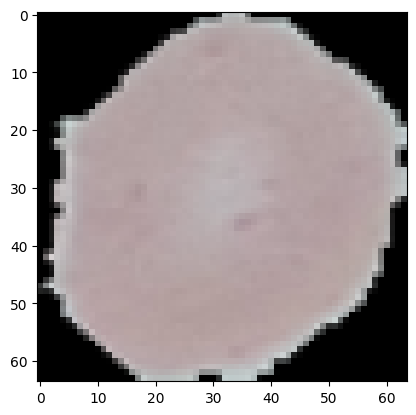

In [ ]:
import matplotlib.pyplot as plt

print('label = ', label[-2])

print('imagem')
plt.imshow(dataset[-2])

In [ ]:
X = np.array(dataset)

X = X/255.0

y = tf.keras.utils.to_categorical(np.array(label))



In [ ]:
print(np.shape(X))

(2000, 64, 64, 3)


In [ ]:
print(y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print(np.shape(X_train))

print(np.shape(y_train))

(1600, 64, 64, 3)
(1600, 2)


In [ ]:
TAM = (SIZE, SIZE, 3)

inp = tf.keras.Input(shape = TAM)

conv1 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(inp)
pool1 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv1)
drop1 = tf.keras.layers.Dropout(rate = 0.2)(pool1)

conv2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv2)
drop2 = tf.keras.layers.Dropout(rate = 0.2)(pool2)

conv3 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv3)
drop3 = tf.keras.layers.Dropout(rate = 0.2)(pool3)

flat = tf.keras.layers.Flatten()(drop3)

dense1 = tf.keras.layers.Dense(512, activation = 'relu')(flat)
drop4 = tf.keras.layers.Dropout(rate = 0.2)(dense1)

dense2 = tf.keras.layers.Dense(256, activation = 'relu')(drop4)
drop5 = tf.keras.layers.Dropout(rate = 0.2)(dense2)

out = tf.keras.layers.Dense(2, activation = 'sigmoid')(drop5)

model = tf.keras.Model(inputs = inp, outputs = out)

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = 'accuracy')

model.summary()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_41 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                     

In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 100, verbose = 1)

Epoch 1/100
45/45 [==============================] - 3s 13ms/step - loss: 0.7027 - accuracy: 0.5069 - val_loss: 0.6838 - val_accuracy: 0.6313
Epoch 2/100
45/45 [==============================] - 0s 8ms/step - loss: 0.6808 - accuracy: 0.5389 - val_loss: 0.6808 - val_accuracy: 0.4500
Epoch 3/100
45/45 [==============================] - 0s 7ms/step - loss: 0.6089 - accuracy: 0.6618 - val_loss: 0.5442 - val_accuracy: 0.7750
Epoch 4/100
45/45 [==============================] - 0s 7ms/step - loss: 0.6068 - accuracy: 0.6625 - val_loss: 0.5361 - val_accuracy: 0.7000
Epoch 5/100
45/45 [==============================] - 0s 7ms/step - loss: 0.5995 - accuracy: 0.6778 - val_loss: 0.5642 - val_accuracy: 0.7000
Epoch 6/100
45/45 [==============================] - 0s 7ms/step - loss: 0.5532 - accuracy: 0.7014 - val_loss: 0.5260 - val_accuracy: 0.7625
Epoch 7/100
45/45 [==============================] - 0s 7ms/step - loss: 0.5913 - accuracy: 0.6687 - val_loss: 0.5437 - val_accuracy: 0.7563
Epoch 8/100


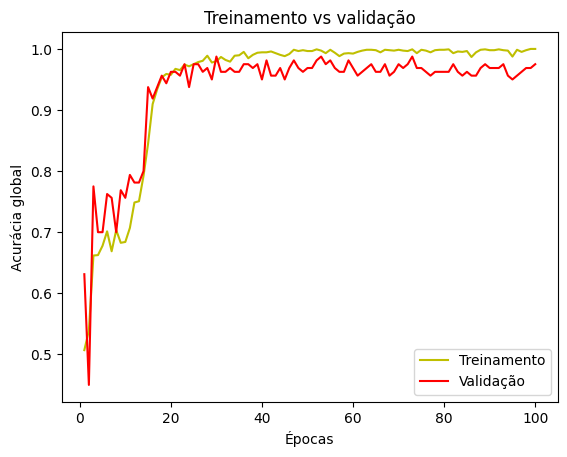

In [ ]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validação")

plt.title("Treinamento vs validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia global")
plt.legend()

plt.show()

In [ ]:
model.save('malaria_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('malaria_model.h5')

In [ ]:
_,score = model.evaluate(X_test, y_test)
print(score)

13/13 [==============================] - 0s 4ms/step - loss: 0.4626 - accuracy: 0.9500
0.949999988079071
